In [2]:
import numpy as np

from plotting.PlottingUtils import umapWithPCA, computeLatentEmbedding
from plotting.__init__ import *
from plotting.visualization import plotPredAllTime, plotPredTestTime
from dataset.dataset_utils import loadSCData

In [3]:
ann_data, cell_tps, cell_types, n_genes, n_tps = loadSCData("zebrafish", "three_interpolation")
data = ann_data.X
traj_data = [data[np.where(cell_tps == t)[0], :] for t in range(1, n_tps + 1)]

[ Data=zebrafish | Split=three_interpolation ] Loading data...


In [4]:
# Visualization - 2D UMAP embeddings
true_data = traj_data  # ground truth 


true_cell_tps = np.concatenate(
    [np.repeat(t, each.shape[0]) for t, each in enumerate(true_data)]
)


true_umap_traj, umap_model, pca_model = umapWithPCA(
    np.concatenate(true_data, axis=0), n_neighbors=50, min_dist=0.1, pca_pcs=50
)

/home/hanyuji/miniconda3/envs/SSSD/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


## 导入预测数据，注意shape：(12, 9582, 2000)

In [8]:
cell_traj = np.load('/mnt/sdb/hanyuji-data/SSSD_results/wot_result/gene_traj_VAE_generate.npy')

cell_traj.shape # (12, 9582, 2000)

(12, 9400, 2000)

In [9]:
# 映射预测数据
reorder_pred_data = cell_traj  # (TimePonit, N, feature)


pred_cell_tps = np.concatenate(
    [np.repeat(t, each.shape[0]) for t, each in enumerate(reorder_pred_data)]
)

pred_umap_traj = umap_model.transform(
    pca_model.transform(np.concatenate(reorder_pred_data, axis=0))
)

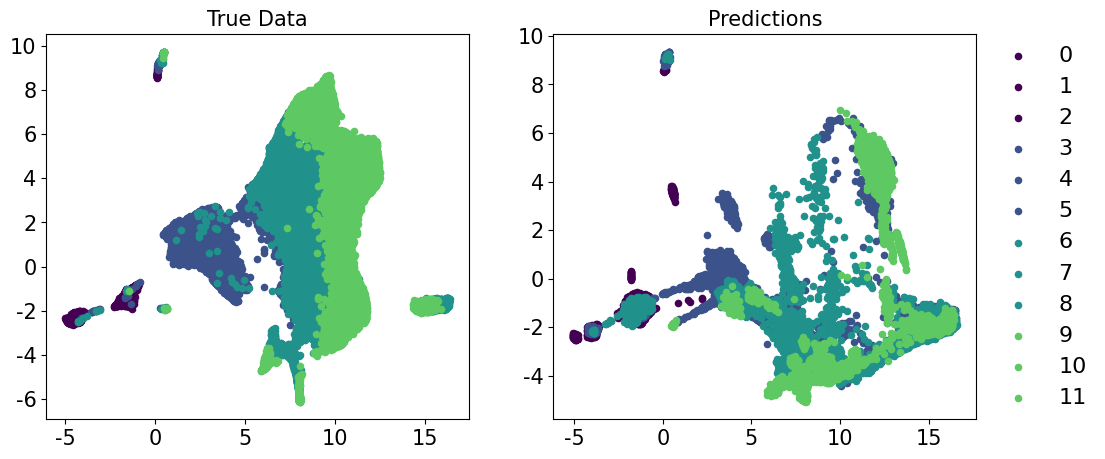

<Figure size 640x480 with 0 Axes>

In [10]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

# 可视化
plotPredAllTime(true_umap_traj, pred_umap_traj, true_cell_tps, pred_cell_tps)

# 折线图

(9400, 12, 128)
(9400, 12, 128)


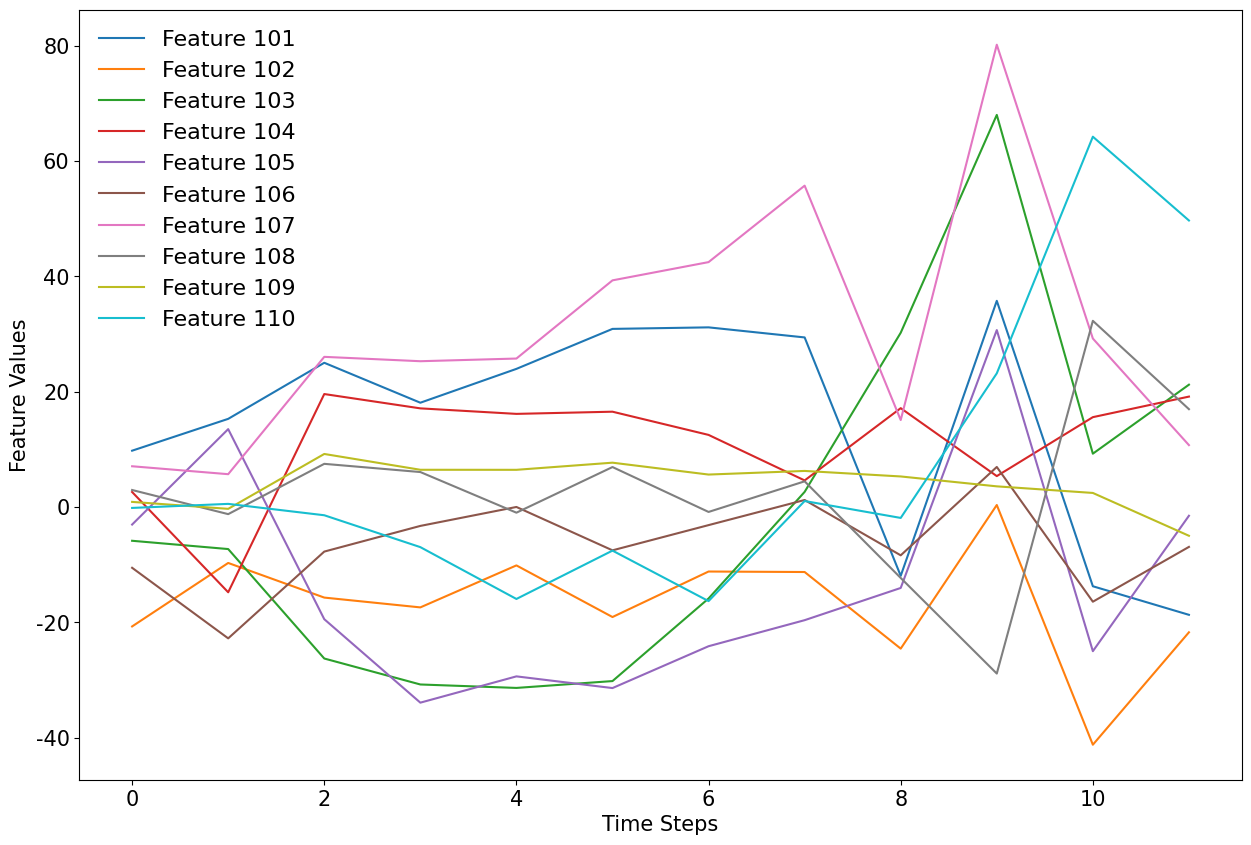

In [12]:
cell_traj = np.load('/mnt/sdb/hanyuji-data/SSSD_results/wot_result/gene_traj_VAE_latent.npy')
print(cell_traj.shape)
# cell_traj = cell_traj.transpose(1,0,2)
print(cell_traj.shape)

################################3

sequence = cell_traj[10]

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

# 绘制所有特征
plt.figure(figsize=(15, 10))

num_features = 10
# num_features = sequence.shape[1]


for i in range(100,110):
    plt.plot(sequence[:, i], label=f'Feature {i+1}')
    # feature_values = sequence[:, i]
    # plt.scatter(range(len(feature_values)), feature_values, label=f'Feature {i+1}')

plt.xlabel('Time Steps')
plt.ylabel('Feature Values')
plt.legend()
plt.show()

(12, 9582, 2000)
(9582, 12, 2000)


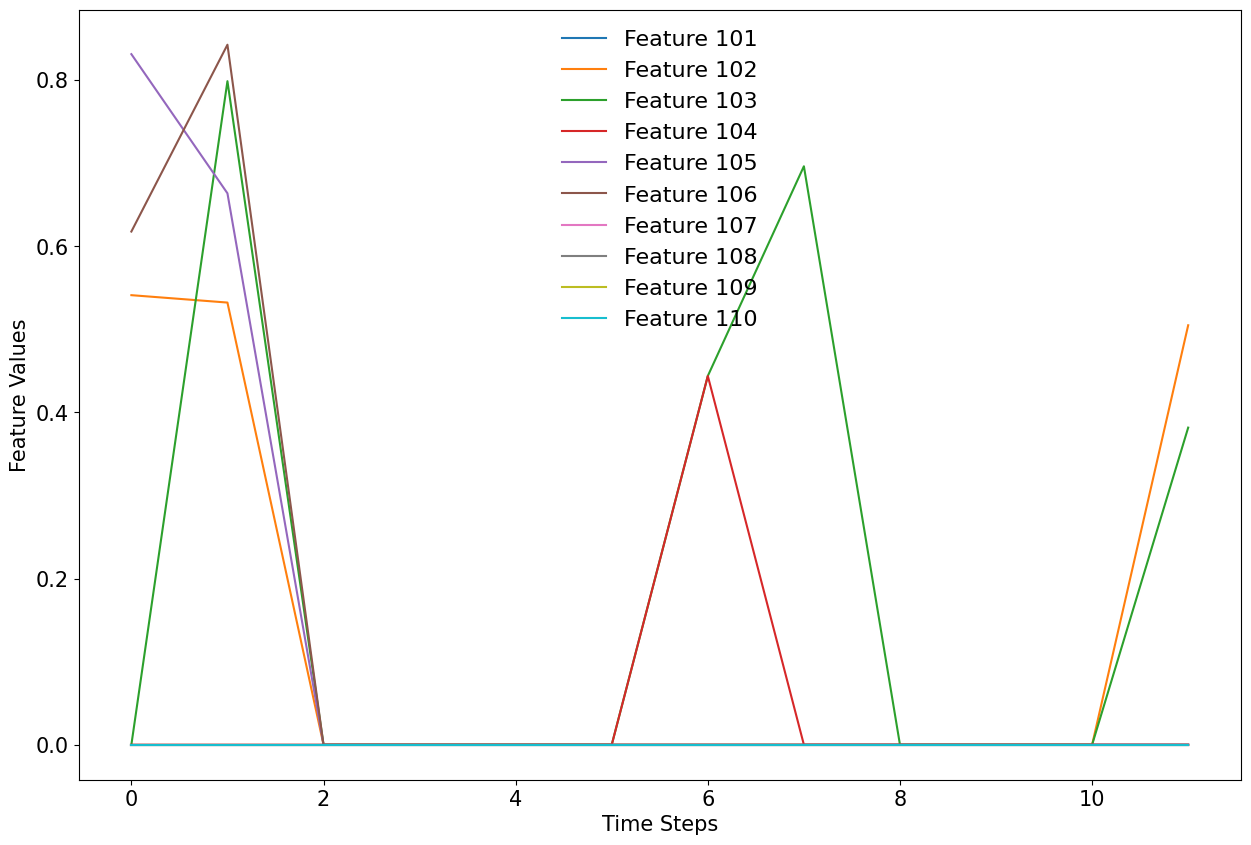

In [25]:
cell_traj = np.load('/mnt/sdb/hanyuji-data/SSSD_results/wot_result/gene_traj_009_by5.npy')
print(cell_traj.shape)
cell_traj = cell_traj.transpose(1,0,2)
print(cell_traj.shape)

################################3

sequence = cell_traj[10]

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

# 绘制所有特征
plt.figure(figsize=(15, 10))

num_features = 10
# num_features = sequence.shape[1]


for i in range(100,110):
    plt.plot(sequence[:, i], label=f'Feature {i+1}')
    # feature_values = sequence[:, i]
    # plt.scatter(range(len(feature_values)), feature_values, label=f'Feature {i+1}')

plt.xlabel('Time Steps')
plt.ylabel('Feature Values')
plt.legend()
plt.show()

# 基因表达值

In [29]:
for i in range(2000):
    print(cell_traj[0,0,i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0887544137177048
0.0
0.0
0.0
2.7058130637038538
0.0
0.0
0.0
0.0
5.584860522524174
0.0
0.0
0.0
5.531001850248813
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.841808859318107
0.0
0.0
0.0
4.156523458056843
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.7058130637038538
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.7058130637038538
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.040696247611585
0.0
0.0
0.0
0.0
0.0
4.519417539065581
0.0
0.0
0.0
3.7588588034897885
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.040696247611585
0.0
2.7058130637038538
0.0
0.0
3.7588588034897885
0.0
0.0
3.7588588034897885
0.0
0.0
0.0
0.0
2.7058130637038538
0.0
0.0
4.156523458056843
3.0887544137177048
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0887544137177048
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.909673879676461
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0773443720891125
0.0
0.0
0.0
0.0
0.0
0.0
3.3649814605831363
0.0
4.6610646107654645
3.581188478300932
0.0
0.0
0.0
3.909673879676461
0.0
0.0
2.7058130637038538
0.0
3.08875441371